<a href="https://colab.research.google.com/github/lilynaza/sentiment_Analysis/blob/main/SentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install snscrape 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 23.1 MB/s 


## Data Scrapping

In [3]:
#importing the libraries needed for scrapping twitter

import pandas as pd
import snscrape.modules.twitter as sntwitter
import itertools
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# nltk 
import nltk
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords

#wordcloud
from wordcloud import WordCloud, STOPWORDS

import re
#library for social media sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [4]:

def search_by_hashtag(keyword, start, end, tweet_limit, file_name, year):
    '''
    This is to search for tweets based on keywords. 
    Keywords: can be string or list 
    Date format: YYYY-MM-DD
    '''
    loc = '9.0820, 8.6753,2000km' #Nigeria coordinates
   
    scraped_tweets = sntwitter.TwitterSearchScraper(f'{keyword} geocode:"{loc}" since:{start} until:{end}').get_items()
    sliced_scraped_tweets = itertools.islice(scraped_tweets, tweet_limit)
    tweets_df = pd.DataFrame(sliced_scraped_tweets) #[['date', 'content']]
    tweets_df.to_csv(f'Twitter{keyword}{year}.csv')
    return tweets_df

In [5]:
start_date = '2022-5-27'
end_date = '2022-6-9'
tweet_limit = 50000

In [6]:
#used the trending hashtag for all parties primary winners
hashtags = ['#Tinubu','#PeterObi4President',
            '#PeterObiPresident','#PeterObi','#Atiku Abubakar',
            '#AtikuWinsIt','#AtikuLeads']
for tweets in hashtags:
    search_by_hashtag(tweets, start=start_date, end=end_date, tweet_limit=tweet_limit,
                      file_name=tweets, year='2022')

In [7]:
#Uing the trending hashtag for the major parties during primaries
hashtags1 = ['#PDPPresidentialPrimaries','#LabourPartyPrimary',
             '#apcpresidentialprimaries','#APCPrimaries',
             '#PDP','#LabourParty4PeterObi','LabourParty']
for tweets in hashtags1:
    search_by_hashtag(tweets, start=start_date, end=end_date, tweet_limit=tweet_limit, 
                      file_name=tweets, year='2022')

In [8]:
tweets = pd.concat(list(map(pd.read_csv, glob.glob('Twitter#*.*'))))

In [9]:
tweets.head()

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,0,https://twitter.com/simi_oyebajo/status/153467...,2022-06-08 23:22:40+00:00,Why will the people who are willing to do evil...,1.534677e+18,simi_oyebajo,[],NaN,[],NaN
1,1,https://twitter.com/bloomsmond/status/15346666...,2022-06-08 22:40:20+00:00,We posted JESUS on @WhatsApp @Twitter @instag...,1.534667e+18,bloomsmond,[],NaN,[],NaN
2,2,https://twitter.com/haruna_mlf/status/15346656...,2022-06-08 22:36:22+00:00,"This picture shows Osinbanjo is strong, if no...",1.534666e+18,haruna_mlf,[],NaN,[],NaN
3,3,https://twitter.com/itszai_nab/status/15346634...,2022-06-08 22:27:30+00:00,This actually needs to be addressed 😭😭\n\nWhat...,1.534663e+18,itszai_nab,[],NaN,[],NaN
4,4,https://twitter.com/klistivivi/status/15346601...,2022-06-08 22:14:23+00:00,Still on the political sagacity displayed by t...,1.534660e+18,klistivivi,[],NaN,[],NaN


In [10]:
print('The shape of the tweet is  ' + str(tweets.shape), ', ' 'The len of the scrapped tweet is  ' + str(len(tweets)))

The shape of the tweet is  (7447, 10) , The len of the scrapped tweet is  7447


## Data Cleaning

Clean the data to remove

   * Special characters such as (@*#)
   * Punctuations
   * Numbers


In [11]:
#Taking a copy of our original DataFrame
test = tweets.copy()

In [12]:
# uniform the data by converting all the data to lower case because Python is a case-sensitive language
tweets = test.apply(lambda x:x.astype(str).str.lower())

In [13]:

# function for twitter text cleaning
def clean_tweets(text):
    #remove RT
    text = re.sub("RT @[\w]*:","",text)
    #remove twitter handles
    text = re.sub("(@[A-Za-z0-9_]+)","", text)
    #remove url links
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                  '(?:%[0-9a-fA-F][0-9a-fA-F]))+'," ", text)
    #remove special characters
    text = re.sub('#'," ", text)
    # remove whitespaces                
    text = " ".join(text.split())
    return text

In [14]:
#Apply text cleaning function to the tweet column in tweets dataframe
tweets['text'] = tweets['content'].apply(lambda x:clean_tweets(x))

In [15]:
tweets.head()

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,text
0,0,https://twitter.com/simi_oyebajo/status/153467...,2022-06-08 23:22:40+00:00,why will the people who are willing to do evil...,1.5346773176913592e+18,simi_oyebajo,[],nan,[],nan,why will the people who are willing to do evil...
1,1,https://twitter.com/bloomsmond/status/15346666...,2022-06-08 22:40:20+00:00,we posted jesus on @whatsapp @twitter @instag...,1.5346666642765496e+18,bloomsmond,[],nan,[],nan,we posted jesus on and the next day some pasto...
2,2,https://twitter.com/haruna_mlf/status/15346656...,2022-06-08 22:36:22+00:00,"this picture shows osinbanjo is strong, if no...",1.5346656668459827e+18,haruna_mlf,[],nan,[],nan,"this picture shows osinbanjo is strong, if not..."
3,3,https://twitter.com/itszai_nab/status/15346634...,2022-06-08 22:27:30+00:00,this actually needs to be addressed 😭😭\n\nwhat...,1.5346634343269253e+18,itszai_nab,[],nan,[],nan,this actually needs to be addressed 😭😭 what is...
4,4,https://twitter.com/klistivivi/status/15346601...,2022-06-08 22:14:23+00:00,still on the political sagacity displayed by t...,1.5346601349405737e+18,klistivivi,[],nan,[],nan,still on the political sagacity displayed by t...


In [16]:
tweets.isnull().sum()

Unnamed: 0       0
url              0
date             0
content          0
id               0
username         0
outlinks         0
outlinksss       0
tcooutlinks      0
tcooutlinksss    0
text             0
dtype: int64

## EDA

In [37]:
#list out all stop words as realated to this twitter data
my_stopwords = set(STOPWORDS)
my_stopwords.update(['the', 'a', 'an', 'and', 'but', 'for', 'on', 'in', 'at','naji','apcprimaries',
                     'labourpartyprimary','apcpresidentialprimaries','apcprimaries',
                     'pdppresidentialPrimaries','apcspecialconvention',
                     'apcconvention','one','now','say','men','man','go','will',
                     'make','guy','sha','us','apcconvention2022','na','said','see',
                     'never','still','known','want','need','bat2023','guy','ooo','pdpprimaries',
                     'peterobi4president2023','abeg','play','money','going','let',
                     'bad','work','god','wey','may',
                     'pyo','amp','abi','name','jesus','dj','asuu','dey','don',
                     'step'])

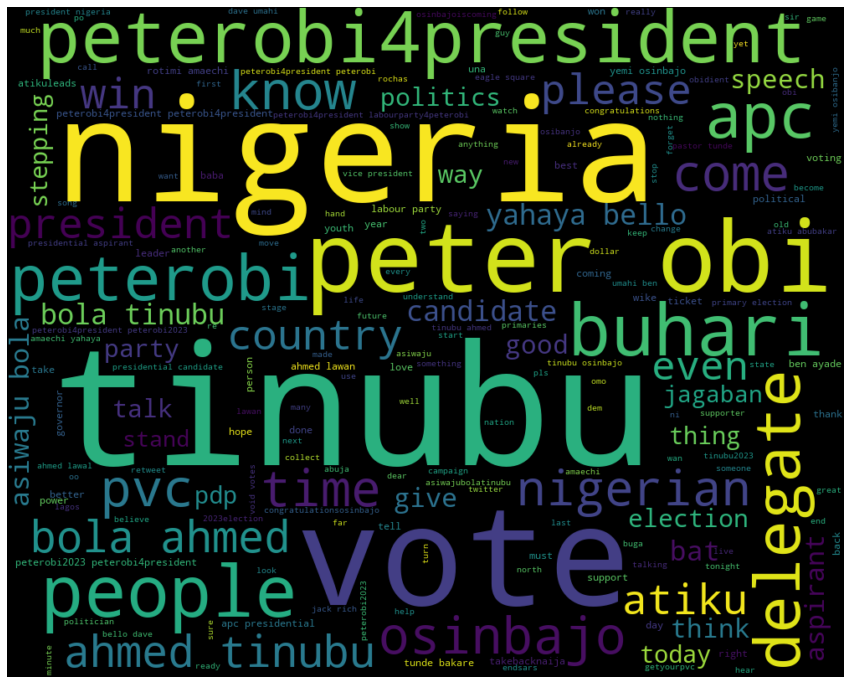

In [38]:
words = ' '.join([text for text in tweets['text']])


wordcloud = WordCloud(width=1000, height=800, random_state=21, background_color='black', stopwords=my_stopwords, max_font_size=200).generate(words)
plt.figure(figsize = (15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [20]:
def hashtag_mention(x):
  hashtags = []
  
  for i in x:
    ht = re.findall(r"#(\w+)", i)
    hashtags.append(ht)
    
  return hashtags

# Extract hashtags

hashtags = hashtag_mention(tweets['content'])

# Unnesting list

hashtags = sum(hashtags, [])

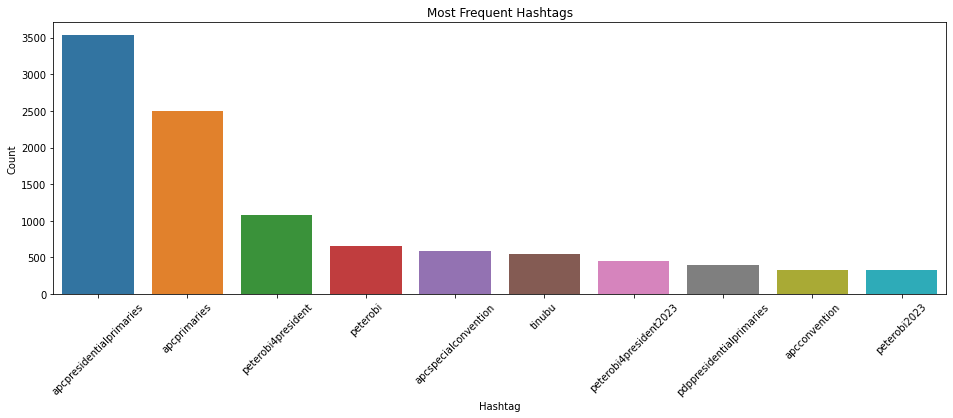

In [21]:
# Frequency Distribution

freq_dist = nltk.FreqDist(hashtags)

graph = pd.DataFrame({'Hashtag': list(freq_dist.keys()), 'Count': list(freq_dist.values())})

# Top 10 Most Frequent Hashtags in the data

graph = graph.nlargest(columns="Count", n = 10)
plt.figure(figsize=(16,5))
axis = sns.barplot(data=graph, x="Hashtag", y="Count")
axis.set(ylabel='Count')
plt.title('Most Frequent Hashtags')
plt.xticks(rotation = 45)
plt.show()

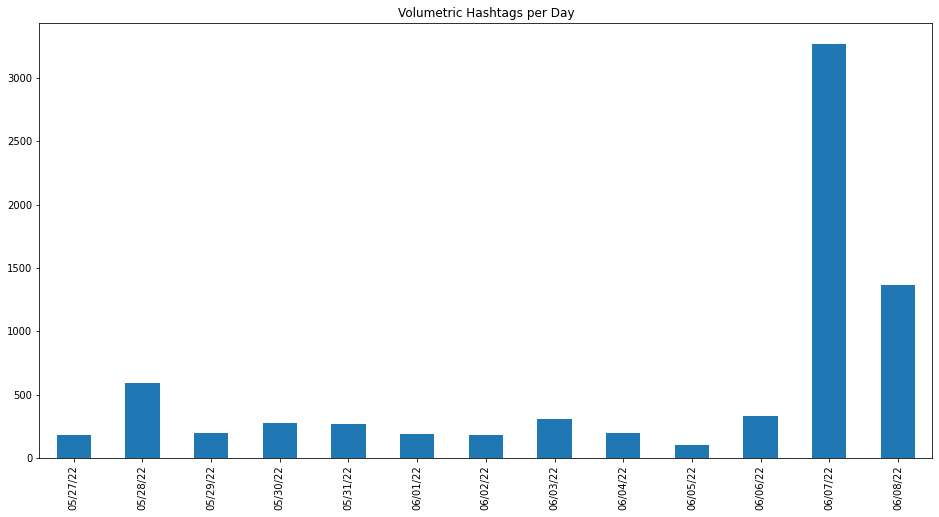

In [40]:
# Volumetric mentions of the word 'hashtags' per day

# Convert date column to datetime format
tweets['date'] = pd.to_datetime(tweets['date'])


# Find occurences of tweets by date
tweeted = tweets['date'].dt.strftime('%D').value_counts().sort_index().plot(kind='bar', title='Volumetric Hashtags per Day', figsize=(16,8))

People tweeted more during the APC's primary election

In [23]:
# Calculate Mentions

def extract_word(tweet):
  words = []
  
  for i in tweet:
    ht = re.findall(r"(\w+)", i)
    words.append(ht)
    
  return words

# Extract words

words = extract_word(tweets['text'])

# words

# Unnesting list

words = sum(words, [])

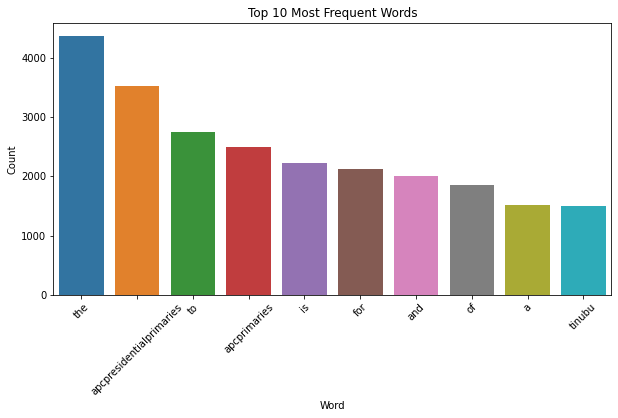

In [24]:
# Frequency Distribution

a = nltk.FreqDist(words)

b = pd.DataFrame({'Word': list(a.keys()), 'Count': list(a.values())})
length = len(b)

# Top 10 Most Frequent Words
b = b.nlargest(columns="Count", n = 10)
plt.figure(figsize=(10,5))
axis = sns.barplot(data=b, x='Word', y='Count')
axis.set(ylabel='Count')
plt.xticks(rotation=45)
plt.title('Top 10 Most Frequent Words')
plt.show()

## Sentiment Analysis

In [25]:
# Calculate Polarity

sid = SentimentIntensityAnalyzer()

tweets['scores'] = tweets['text'].apply(lambda text: sid.polarity_scores(text))

tweets.head()

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,text,mentions,scores
0,0,https://twitter.com/simi_oyebajo/status/153467...,2022-06-08 23:22:40+00:00,why will the people who are willing to do evil...,1.5346773176913592e+18,simi_oyebajo,[],nan,[],nan,why will the people who are willing to do evil...,"AxesSubplot(0.125,0.125;0.775x0.755)","{'neg': 0.147, 'neu': 0.74, 'pos': 0.112, 'com..."
1,1,https://twitter.com/bloomsmond/status/15346666...,2022-06-08 22:40:20+00:00,we posted jesus on @whatsapp @twitter @instag...,1.5346666642765496e+18,bloomsmond,[],nan,[],nan,we posted jesus on and the next day some pasto...,"AxesSubplot(0.125,0.125;0.775x0.755)","{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'comp..."
2,2,https://twitter.com/haruna_mlf/status/15346656...,2022-06-08 22:36:22+00:00,"this picture shows osinbanjo is strong, if no...",1.5346656668459827e+18,haruna_mlf,[],nan,[],nan,"this picture shows osinbanjo is strong, if not...","AxesSubplot(0.125,0.125;0.775x0.755)","{'neg': 0.125, 'neu': 0.667, 'pos': 0.208, 'co..."
3,3,https://twitter.com/itszai_nab/status/15346634...,2022-06-08 22:27:30+00:00,this actually needs to be addressed 😭😭\n\nwhat...,1.5346634343269253e+18,itszai_nab,[],nan,[],nan,this actually needs to be addressed 😭😭 what is...,"AxesSubplot(0.125,0.125;0.775x0.755)","{'neg': 0.257, 'neu': 0.666, 'pos': 0.078, 'co..."
4,4,https://twitter.com/klistivivi/status/15346601...,2022-06-08 22:14:23+00:00,still on the political sagacity displayed by t...,1.5346601349405737e+18,klistivivi,[],nan,[],nan,still on the political sagacity displayed by t...,"AxesSubplot(0.125,0.125;0.775x0.755)","{'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'comp..."


In [26]:
def sentimentPredict(sentiment):
  if sentiment['compound'] >= 0.05:
    return "Positive"
  elif sentiment['compound'] <= -0.05:
    return "Negative"
  else:
    return "Neutral"

In [27]:
tweets['label'] =tweets['scores'].apply(lambda x: sentimentPredict(x))

In [28]:
tweets.head()

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,text,mentions,scores,label
0,0,https://twitter.com/simi_oyebajo/status/153467...,2022-06-08 23:22:40+00:00,why will the people who are willing to do evil...,1.5346773176913592e+18,simi_oyebajo,[],nan,[],nan,why will the people who are willing to do evil...,"AxesSubplot(0.125,0.125;0.775x0.755)","{'neg': 0.147, 'neu': 0.74, 'pos': 0.112, 'com...",Negative
1,1,https://twitter.com/bloomsmond/status/15346666...,2022-06-08 22:40:20+00:00,we posted jesus on @whatsapp @twitter @instag...,1.5346666642765496e+18,bloomsmond,[],nan,[],nan,we posted jesus on and the next day some pasto...,"AxesSubplot(0.125,0.125;0.775x0.755)","{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'comp...",Positive
2,2,https://twitter.com/haruna_mlf/status/15346656...,2022-06-08 22:36:22+00:00,"this picture shows osinbanjo is strong, if no...",1.5346656668459827e+18,haruna_mlf,[],nan,[],nan,"this picture shows osinbanjo is strong, if not...","AxesSubplot(0.125,0.125;0.775x0.755)","{'neg': 0.125, 'neu': 0.667, 'pos': 0.208, 'co...",Positive
3,3,https://twitter.com/itszai_nab/status/15346634...,2022-06-08 22:27:30+00:00,this actually needs to be addressed 😭😭\n\nwhat...,1.5346634343269253e+18,itszai_nab,[],nan,[],nan,this actually needs to be addressed 😭😭 what is...,"AxesSubplot(0.125,0.125;0.775x0.755)","{'neg': 0.257, 'neu': 0.666, 'pos': 0.078, 'co...",Negative
4,4,https://twitter.com/klistivivi/status/15346601...,2022-06-08 22:14:23+00:00,still on the political sagacity displayed by t...,1.5346601349405737e+18,klistivivi,[],nan,[],nan,still on the political sagacity displayed by t...,"AxesSubplot(0.125,0.125;0.775x0.755)","{'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'comp...",Positive


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


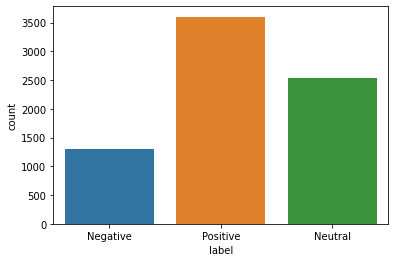

In [29]:
#visualization of the polarity
import seaborn as sns
sns.countplot(tweets['label'], label='count') 

In [30]:
positive = tweets[tweets['label']== 'Positive']
negative = tweets[tweets['label']== 'Negative']
neutral=tweets[tweets['label']=='Neutral']

In [31]:
print(f'total no of positive tweets:' ,len(positive) )
print(f'total no of neutral tweets:' ,len(neutral) )
print(f'total no of negative tweets:' ,len(negative) )

total no of positive tweets: 3602
total no of neutral tweets: 2540
total no of negative tweets: 1305


WordCloud of the negative tweets


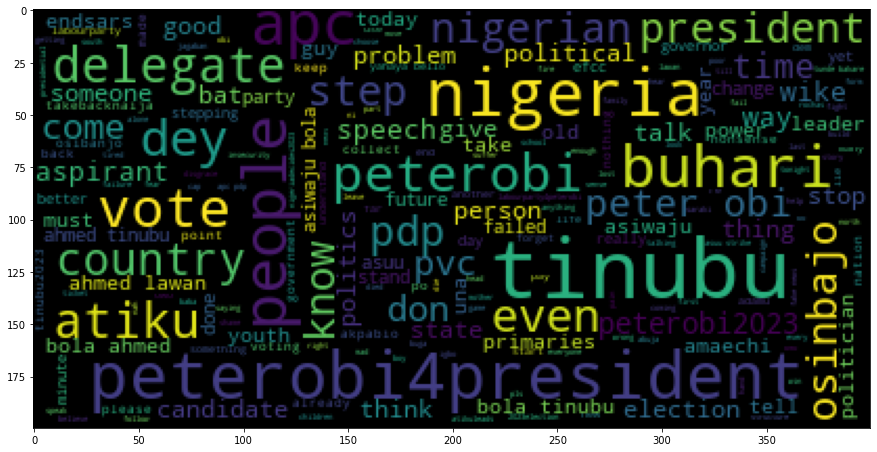

In [32]:
print('WordCloud of the negative tweets')
neg_sentences = negative['text'].tolist()
neg_sentences_as_one_string = " ".join(neg_sentences)
plt.figure(figsize = (15,15))
wordcloud = WordCloud(background_color='black',max_font_size = 40,stopwords=my_stopwords,random_state=21).generate(neg_sentences_as_one_string)
plt.imshow(wordcloud)

WordCloud of the postive tweets


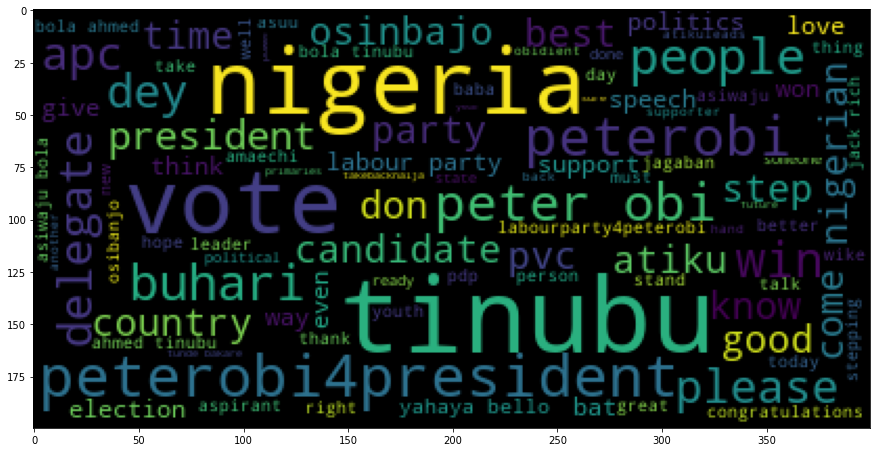

In [33]:
print('WordCloud of the postive tweets')
pos_sentences = positive['text'].tolist()
pos_sentences_as_one_string = " ".join(pos_sentences)
plt.figure(figsize = (15,15))
wordcloud = WordCloud(background_color='black',max_font_size = 50,stopwords=my_stopwords,random_state=21).generate(pos_sentences_as_one_string)
plt.imshow(wordcloud)

WordCloud of the neutral tweets


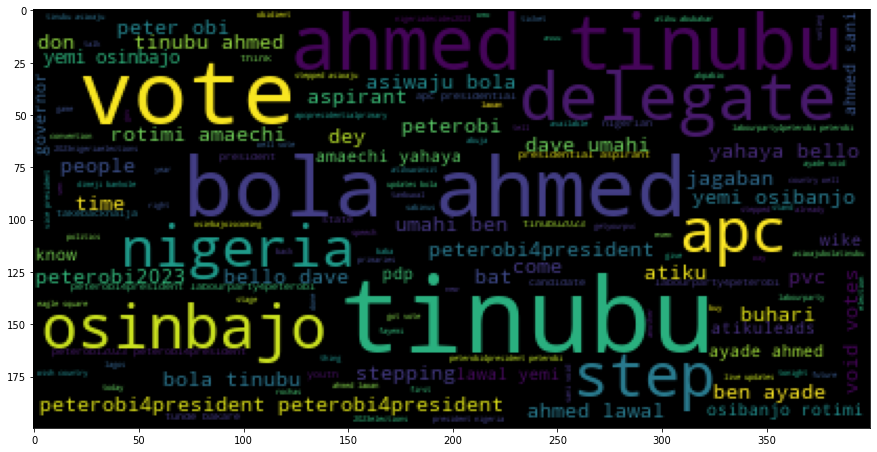

In [34]:
print('WordCloud of the neutral tweets')
pos_sentences = neutral['text'].tolist()
pos_sentences_as_one_string = " ".join(pos_sentences)
plt.figure(figsize = (15,15))
wordcloud = WordCloud(background_color='black',max_font_size = 50,stopwords=my_stopwords,random_state=21).generate(pos_sentences_as_one_string)
plt.imshow(wordcloud)

In [35]:
tweets.drop(['label','scores'],axis = 1, inplace = True)
analyser = SentimentIntensityAnalyzer()

scores = []
for sentence in tweets['text']:
  score = analyser.polarity_scores(sentence)
  scores.append(score)
  
scores = pd.DataFrame(scores)

tweets['Compound'] = scores['compound']
tweets['Negative'] = scores['neg']
tweets['Neutral'] = scores['neu']
tweets['Positive'] = scores['pos']
tweets.head()

,Unnamed: 0,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,text,mentions,Compound,Negative,Neutral,Positive
0,0,https://twitter.com/simi_oyebajo/status/153467...,2022-06-08 23:22:40+00:00,why will the people who are willing to do evil...,1.5346773176913592e+18,simi_oyebajo,[],nan,[],nan,why will the people who are willing to do evil...,"AxesSubplot(0.125,0.125;0.775x0.755)",-0.4933,0.147,0.740,0.112
1,1,https://twitter.com/bloomsmond/status/15346666...,2022-06-08 22:40:20+00:00,we posted jesus on @whatsapp @twitter @instag...,1.5346666642765496e+18,bloomsmond,[],nan,[],nan,we posted jesus on and the next day some pasto...,"AxesSubplot(0.125,0.125;0.775x0.755)",0.7351,0.000,0.857,0.143
2,2,https://twitter.com/haruna_mlf/status/15346656...,2022-06-08 22:36:22+00:00,"this picture shows osinbanjo is strong, if no...",1.5346656668459827e+18,haruna_mlf,[],nan,[],nan,"this picture shows osinbanjo is strong, if not...","AxesSubplot(0.125,0.125;0.775x0.755)",0.6116,0.125,0.667,0.208
3,3,https://twitter.com/itszai_nab/status/15346634...,2022-06-08 22:27:30+00:00,this actually needs to be addressed 😭😭\n\nwhat...,1.5346634343269253e+18,itszai_nab,[],nan,[],nan,this actually needs to be addressed 😭😭 what is...,"AxesSubplot(0.125,0.125;0.775x0.755)",-0.7550,0.257,0.666,0.078
4,4,https://twitter.com/klistivivi/status/15346601...,2022-06-08 22:14:23+00:00,still on the political sagacity displayed by t...,1.5346601349405737e+18,klistivivi,[],nan,[],nan,still on the political sagacity displayed by t...,"AxesSubplot(0.125,0.125;0.775x0.755)",0.9468,0.000,0.687,0.313


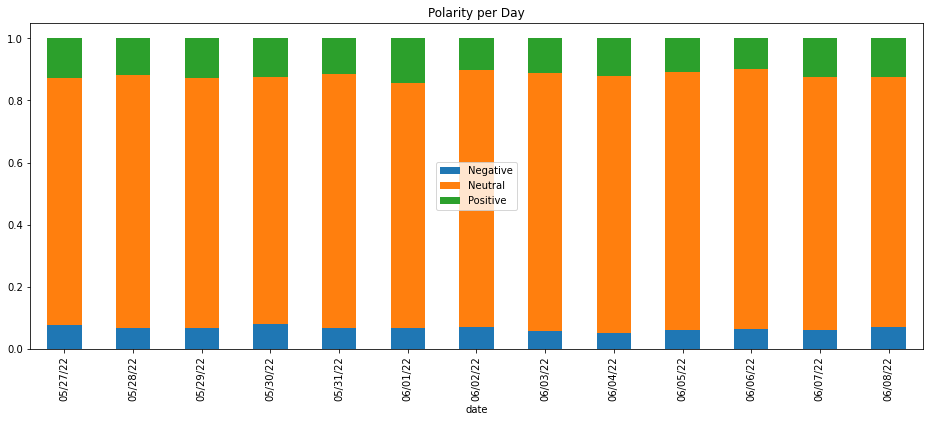

In [36]:

# Convert date column to datetime format
tweets['date'] = pd.to_datetime(tweets['date'])
tweets['date'] = tweets['date'].dt.strftime('%D')

x = tweets[['date', 'Negative', 'Neutral', 'Positive']]
y = x.set_index('date')
tweet = y.groupby('date').mean()

tweet.plot.bar(stacked=True, title='Polarity per Day', figsize=(16,6))


Most of the tweets in the days were netural, 6th may had the highest positive score.